<a href="https://colab.research.google.com/github/anumit-web/python-interview-2024/blob/main/machine%20learning/Unsupervised_Learning_clustering_type_iris_flower_clustering_Gaussian_mixture_model_(GMM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python interview preparation

# Machine Learning

# Supervised Learning

# Support Vector Machines (SVM)

# Iris dataset

# Chapter 1

---

---

# Python Code

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
import sys

print(sys.version)

3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]


In [6]:
print("Hello, World!")

Hello, World!


# Python code

In [7]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url= "https://kirenz.github.io/classification/_images/iris.png")

# Load dataset

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



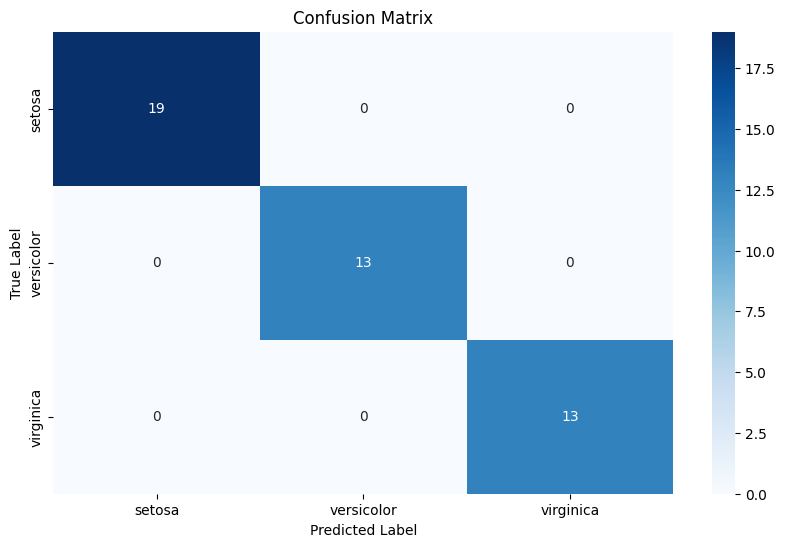

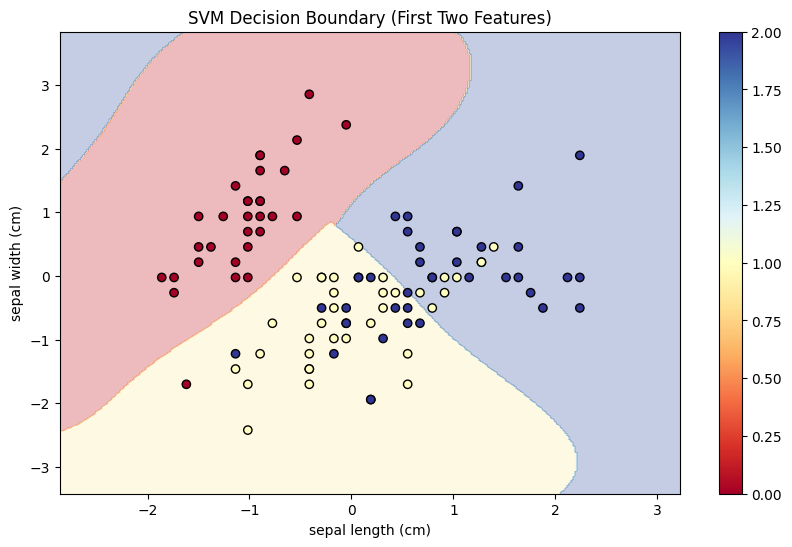

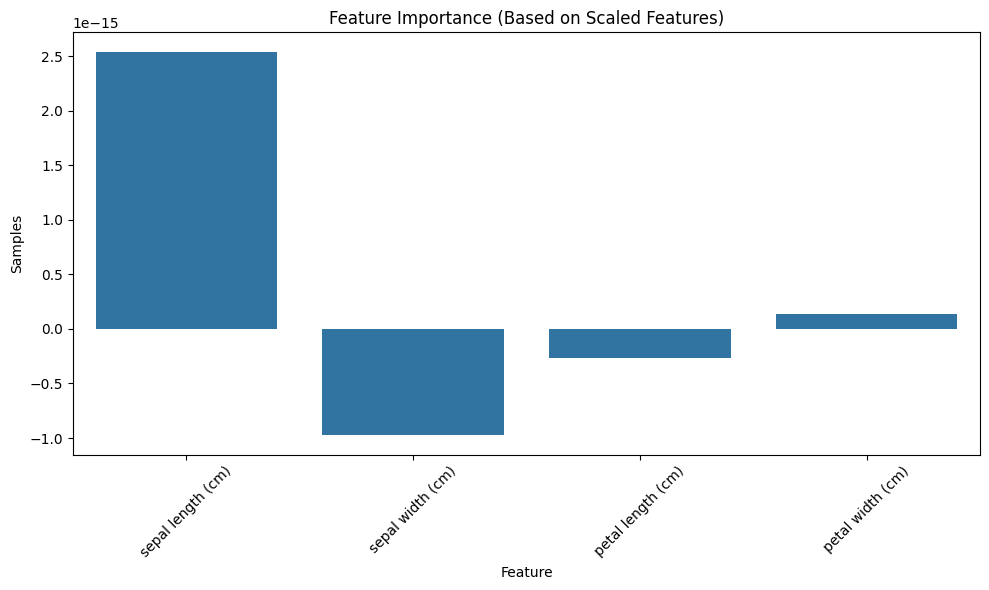

In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame for better visualization
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['target'] = y
iris_df['target_names'] = iris_df['target'].map({
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred,
                          target_names=iris.target_names))

# Create confusion matrix visualization
plt.figure(figsize=(10, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Visualization of decision boundaries (using first two features)
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # step size in the mesh

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

    # Make predictions on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)

    # Plot training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y,
                         cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title)
    plt.colorbar(scatter)
    plt.show()

# Create and train SVM model for visualization (using first two features)
X_vis = X_train_scaled[:, :2]
svm_vis = SVC(kernel='rbf', random_state=42)
svm_vis.fit(X_vis, y_train)

# Plot decision boundary
plot_decision_boundary(X_vis, y_train, svm_vis,
                      'SVM Decision Boundary (First Two Features)')

# Feature importance visualization (using absolute values of coefficients)
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': iris.feature_names,
    'Samples': [X_train_scaled[:, i].mean() for i in range(4)]
})
sns.barplot(data=feature_importance, x='Feature', y='Samples')
plt.title('Feature Importance (Based on Scaled Features)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()